In [1]:
from PortfolioSelection import asset_picker, asset_allocation, valuate_portfolio
from Trade import trade
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import numpy as np

data = pd.read_excel('Data/data.xlsx').drop(columns=['Unnamed: 0'])
data = data[data.Stock != 'ABC']


In [2]:
## Investing Process
def InvestingProcess(data, portfolio, fiscal_date, initial_date, initial_capital, verbose):
    # Functions
    assets_list = asset_picker(data, portfolio, fiscal_date)
    weights = asset_allocation(data, assets_list, fiscal_date)
    if fiscal_date == initial_date:
        portfolio_value = initial_capital
        initial_trade = True
    else:
        portfolio_value = valuate_portfolio(data, portfolio, fiscal_date)
        initial_trade = False
    portfolio, cash = trade(data, portfolio, weights, portfolio_value, assets_list, fiscal_date, initial_trade, initial_capital, verbose)
    return portfolio

## Portfolio Valuation
def portfolio_valuation(portfolio):
    capitals = portfolio[portfolio.Asset != 'Rf']
    valuation = capitals.Amount * capitals.Price
    valuation = valuation.sum()
    if 'Rf' in portfolio.Asset.values:
        valuation += portfolio[portfolio.Asset == 'Rf'].Amount.iloc[0]
    return valuation

In [3]:
### Backtesting
def Backtesting(data, initial_capital: int = 1000000, verbose: bool = False):
    portfolio = pd.DataFrame(columns=['Date','Asset','Amount','Price'])
    value_in_time = pd.DataFrame(columns=['Date','Portfolio'])
    fiscal_dates = data.fiscalDateEnding.unique()
    initial_date = fiscal_dates[0]
    # Calculate the total amount of money in the portfolio at each step
    for fiscal_date in fiscal_dates:
        if verbose:
            print('Date :', fiscal_date)
        portfolio = InvestingProcess(data, portfolio, fiscal_date, initial_date, initial_capital, verbose)
        print(portfolio)
        valuation = portfolio_valuation(portfolio)
        valuation = pd.DataFrame([fiscal_date, valuation], index = ['Date', 'Portfolio']).T
        value_in_time = pd.concat([value_in_time, valuation], axis=0, ignore_index=True)
        if verbose:
            print('Assets: ', portfolio.Asset.values)
            print('')
    return value_in_time

In [5]:
a = Backtesting(data, verbose=True)

Date : 2018-12-31 00:00:00
Portfolio Value:  1000000
TRADE ORDER
   Old Asset      New  TradeOrder
0    0   LIN    127.0       127.0
1    0  GOOG   5952.0      5952.0
2    0   EIX    740.0       740.0
3    0   GIS   1726.0      1726.0
4    0   EMR  11012.0     11012.0
Sell Order
Empty DataFrame
Columns: [Asset, TradeOrder]
Index: []
Full purchase
Cash spent in capitals:  18362.181518554688  Remaining:  981637.8184814453
Full purchase
Cash spent in capitals:  308197.5270996094  Remaining:  673440.2913818359
Full purchase
Cash spent in capitals:  34294.747619628906  Remaining:  639145.543762207
Full purchase
Cash spent in capitals:  56909.461517333984  Remaining:  582236.082244873
Full purchase
Cash spent in capitals:  582066.3077545166  Remaining:  169.7744903564453
Rf bought: 169.7744903564453
        Date Asset     Amount       Price
0 2018-12-31   LIN      127.0  144.584106
1 2018-12-31  GOOG     5952.0   51.780499
2 2018-12-31   EIX      740.0   46.344254
3 2018-12-31   GIS     1726

IndexError: index 0 is out of bounds for axis 0 with size 0

<Axes: xlabel='Date'>

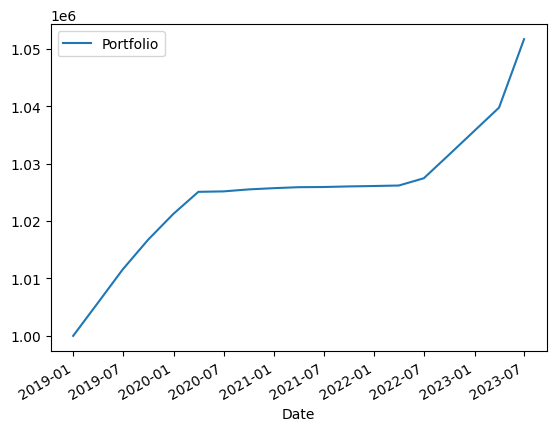

In [ ]:
a.set_index('Date').plot()